# OCT image classification using Xception (without data augmentation)

In [1]:
import pandas as pd
import numpy as np
import scipy.misc as sc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import os
from tqdm import tqdm
import cv2

import tensorflow as tf

import skimage

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
train_dir = '../input/kermany2018/OCT2017 /train'

In [3]:
test_dir = '../input/kermany2018/OCT2017 /test'

In [4]:
labels = os.listdir(train_dir)
labels

['DRUSEN', 'CNV', 'NORMAL', 'DME']

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
        validation_split = .2)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
IMG_SIZE = 256
batch_size = 32

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical')

Found 66788 images belonging to 4 classes.


In [9]:
print('Number of samples: ', train_generator.samples)
print('Number of classes: ', len(train_generator.class_indices))
print('Number of samples per class: ', int(train_generator.samples/len(train_generator.class_indices)))

Number of samples:  66788
Number of classes:  4
Number of samples per class:  16697


In [10]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=batch_size,
    subset='validation',
    shuffle = False,
    class_mode='categorical')

Found 16696 images belonging to 4 classes.


In [11]:
print('Number of samples: ', validation_generator.samples)
print('Number of classes: ', len(validation_generator.class_indices))
print('Number of samples per class: ', int(validation_generator.samples/len(validation_generator.class_indices)))

Number of samples:  16696
Number of classes:  4
Number of samples per class:  4174


In [12]:
# instantiate Xception model
base_model = tf.keras.applications.xception.Xception(input_shape=(256,256,3),
                                    include_top=False,
                                    weights='imagenet')
base_model.trainable = True

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),  # add AveragePooling Layer
tf.keras.layers.Dense(4, activation='sigmoid') # add dense layer with output shape 4 for four classes
])

# Print out model summary
model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 20,869,676
Trainable params: 20,815,148
Non-trainable params: 54,528
_________________________________________________________________


In [13]:
# configure the model with losses and metrics
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# train model
history = model.fit(train_generator,
                                  steps_per_epoch=500,
                                  epochs= 30,
                                  verbose=1,
                                  validation_data=validation_generator)

Epoch 1/30
500/500 [==============================] - 432s 838ms/step - loss: 0.3687 - accuracy: 0.8747 - val_loss: 0.2225 - val_accuracy: 0.9335
Epoch 2/30
500/500 [==============================] - 343s 686ms/step - loss: 0.1725 - accuracy: 0.9440 - val_loss: 0.2683 - val_accuracy: 0.9118
Epoch 3/30
500/500 [==============================] - 344s 688ms/step - loss: 0.1589 - accuracy: 0.9486 - val_loss: 0.1987 - val_accuracy: 0.9377
Epoch 4/30
500/500 [==============================] - 348s 696ms/step - loss: 0.1328 - accuracy: 0.9533 - val_loss: 0.1933 - val_accuracy: 0.9350
Epoch 5/30
500/500 [==============================] - 345s 690ms/step - loss: 0.1142 - accuracy: 0.9604 - val_loss: 0.1468 - val_accuracy: 0.9523
Epoch 6/30
500/500 [==============================] - 344s 687ms/step - loss: 0.1320 - accuracy: 0.9575 - val_loss: 0.2165 - val_accuracy: 0.9325
Epoch 7/30
500/500 [==============================] - 341s 682ms/step - loss: 0.1117 - accuracy: 0.9642 - val_loss: 0.1333 -

In [15]:
model.save("Xception_eye_classifier_01.h5")

In [16]:
print ('Train Accuracy', np.mean(history.history['accuracy']))
print ('Train Loss', np.mean(history.history['loss']))
print ('Validation Accuracy', np.mean(history.history['val_accuracy']))
print ('Validation Loss', np.mean(history.history['val_loss']))

Train Accuracy 0.9720338265101115
Train Loss 0.08427328703304132
Validation Accuracy 0.9252535541852315
Validation Loss 0.2887701446811358


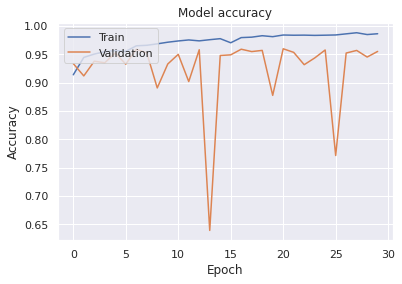

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

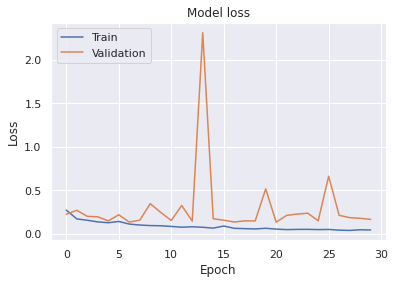

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=batch_size,
    class_mode='categorical')

Found 968 images belonging to 4 classes.


In [20]:
print('Number of samples: ', test_generator.samples)
print('Number of classes: ', len(test_generator.class_indices))
print('Number of samples per class: ', int(test_generator.samples/len(test_generator.class_indices)))

Number of samples:  968
Number of classes:  4
Number of samples per class:  242


In [21]:
predictions = model.predict(test_generator, verbose=1)

31/31 [==============================] - 11s 318ms/step


In [22]:
predictions

array([[4.2250191e-05, 8.1158476e-04, 5.2984562e-02, 9.9866498e-01],
       [2.6758488e-02, 9.8187995e-01, 5.3117570e-04, 6.6421799e-02],
       [1.5020846e-06, 2.5074030e-04, 3.0102599e-02, 9.9970466e-01],
       ...,
       [1.3227172e-02, 8.3304585e-08, 9.9868625e-01, 1.0371647e-03],
       [9.9986887e-01, 4.1814405e-06, 2.1757104e-03, 3.0769440e-09],
       [9.9294043e-01, 1.5369717e-04, 3.3371039e-03, 1.1712897e-06]],
      dtype=float32)

In [23]:
np.argmax(predictions[0])

3

In [24]:
# test loss, test accuracy
model.evaluate(test_generator)

31/31 [==============================] - 5s 149ms/step - loss: 0.0203 - accuracy: 0.9938


[0.020287930965423584, 0.9938016533851624]